# Data

In [ ]:
import sklearn.datasets
import numpy as np

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [ ]:
X=breast_cancer.data
Y=breast_cancer.target

In [ ]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [ ]:
import pandas as pd


In [ ]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [ ]:
data['class']=breast_cancer.target

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [ ]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [ ]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


#  Test Train split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.drop('class',axis=1)
Y=data['class']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y)

In [ ]:
print(X_train.shape,X_test.shape)

(426, 30) (143, 30)


In [ ]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.6267605633802817 0.6293706293706294


In [ ]:
print(X_train.mean(), X_test.mean(),X.mean())

mean radius                 14.078061
mean texture                19.374390
mean perimeter              91.631549
mean area                  649.859624
mean smoothness              0.095819
mean compactness             0.103968
mean concavity               0.087757
mean concave points          0.048161
mean symmetry                0.181046
mean fractal dimension       0.062727
radius error                 0.399646
texture error                1.201198
perimeter error              2.827948
area error                  39.901786
smoothness error             0.006942
compactness error            0.025683
concavity error              0.031655
concave points error         0.011690
symmetry error               0.020270
fractal dimension error      0.003797
worst radius                16.203146
worst texture               25.762864
worst perimeter            106.817676
worst area                 873.187559
worst smoothness             0.131874
worst compactness            0.256019
worst concav

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y,random_state=1)#ensures that the train test split occurs in the same manner/way

# Binarisation of input

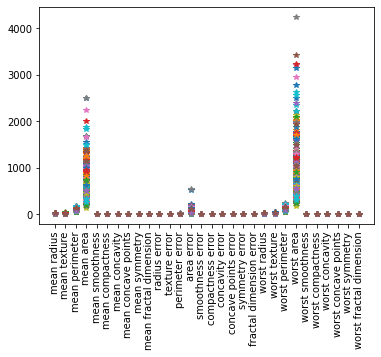

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_bianrised_3_train = X_train['mean area'].map(lambda x:0 if x<1000 else 1)

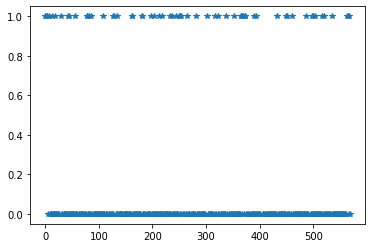

In [ ]:
plt.plot(X_bianrised_3_train,'*')

In [ ]:
#using pandas we can binarised all columns with 1 line of cut with the help .apply() function
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])
#malignant values are more , so in ordeer to get higher accuracy we need to chnge label from 0,1 to 1,0

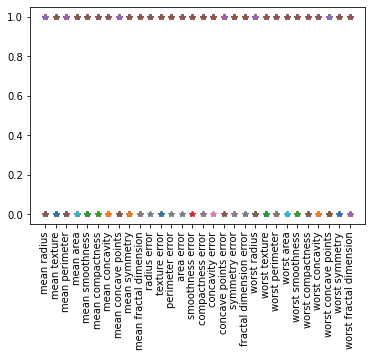

In [ ]:
plt.plot(X_binarised_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [ ]:
type(X_binarised_train)

pandas.core.frame.DataFrame

In [ ]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [ ]:
type(X_binarised_train)

numpy.ndarray

# MP Neuron Model

In [ ]:
from random import randint

In [ ]:
b=3
i = randint(0, X_binarised_train.shape[0])
print('for row',i)
if (np.sum(X_binarised_train[100, :])>=b):
  print('MP Nueron inference is malignant')
else:
  print('MP Neuron inference is benign')
if (Y_train[i]==1):
  print('Ground truth is malignant')
else:
  print('Ground truth is benign')

for row 212
MP Nueron inference is malignant
Ground truth is benign


In [ ]:
b=3
Y_pred_train = []
accurate_rows = 0
for x,y in zip(X_binarised_train, Y_train):
  y_pred = (np.sum(x)>=b)
  Y_pred_train.append(y_pred)
  accurate_rows+=(y==y_pred)
print(accurate_rows)
print(accurate_rows/X_binarised_train.shape[0])

267
0.6267605633802817


In [ ]:
for b in range(X_binarised_train.shape[1]+1):
  Y_pred_train = []
  accurate_rows = 0
  for x,y in zip(X_binarised_train, Y_train):
    y_pred = (np.sum(x)>=b)
    Y_pred_train.append(y_pred)
    accurate_rows+=(y==y_pred)
  print(b,accurate_rows/X_binarised_train.shape[0])


0 0.6267605633802817
1 0.6267605633802817
2 0.6267605633802817
3 0.6267605633802817
4 0.6267605633802817
5 0.6267605633802817
6 0.6267605633802817
7 0.6267605633802817
8 0.6267605633802817
9 0.6267605633802817
10 0.6267605633802817
11 0.6267605633802817
12 0.6267605633802817
13 0.6291079812206573
14 0.6338028169014085
15 0.6384976525821596
16 0.6455399061032864
17 0.6549295774647887
18 0.6596244131455399
19 0.6690140845070423
20 0.6784037558685446
21 0.6971830985915493
22 0.7136150234741784
23 0.7347417840375586
24 0.7676056338028169
25 0.8004694835680751
26 0.8262910798122066
27 0.8403755868544601
28 0.852112676056338
29 0.8169014084507042
30 0.7582159624413145


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
b=28
Y_pred_test = []
  
for x in X_binarised_test:
  y_pred = (np.sum(x)>=b)
  Y_pred_test.append(y_pred)
accuracy = accuracy_score(Y_pred_test, Y_test)    
print(b,accuracy)

28 0.8531468531468531


# MP Neuron Class

In [ ]:
class MPNeuron:
  def __init__(self):
    self.b=None
  
  def model(self,x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy={}

    for b in range(X.shape[1]+1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b

    print('Optimal value of b is',best_b)
    print('Highest accuracy is',accuracy[best_b])

In [ ]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is 28
Highest accuracy is 0.852112676056338


In [ ]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

In [ ]:
print(accuracy_test)

0.8531468531468531


# Perceptron Class

$y = 1,\mbox{if}\sum_i w_i x_i >=b$

$y=0,\mbox(otherwise)$

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None
  def model(self,x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
  def predict(self, X):
    Y=[]
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y, epochs=1, lr=1):
    self.w = np.ones(X.shape[1])
    self.b=0
    accuracy={}
    max_accuracy = 0

    wt_matrix=[]

    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y==1 and y_pred==0:
          self.w = self.w + lr*x
          self.b = self.b + lr*1
        elif y==0 and y_pred==1:
          self.w = self.w - lr*x
          self.b = self.b - lr*1
      
      wt_matrix.append(self.w)
      accuracy[i]=accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b

    self.w = chkptw
    self.b = chkptb
    print(max_accuracy)

    #plt.plot(accuracy.values())
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.ylim((0,1))
    plt.show()
    return np.array(wt_matrix)

In [ ]:
perceptron = Perceptron()


0.9154929577464789


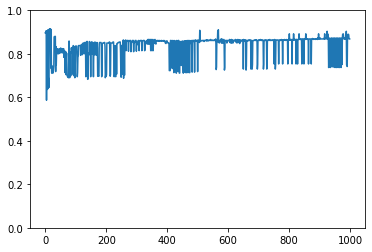

In [ ]:
wt_matrix = perceptron.fit(X_train, Y_train, 1000, 0.01)

In [ ]:
Y_pred_train = perceptron.predict(X_train)
print(accuracy_score(Y_pred_train, Y_train))

0.9154929577464789


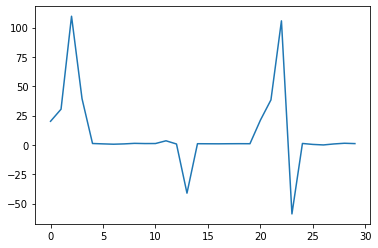

In [ ]:
plt.plot(perceptron.w)
plt.show()

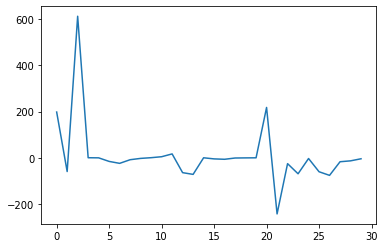

In [ ]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [ ]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9370629370629371


In [ ]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

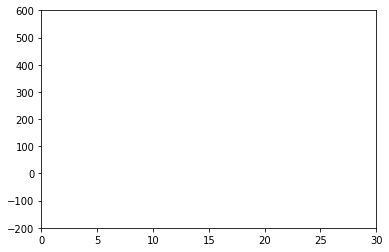

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-200, 600))

line, = ax.plot([], [], lw=2)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=1000, interval=20, blit=True)

In [ ]:
HTML(anim.to_html5_video())